In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report

In [6]:
train_dir = "C:\\Users\\HP\\Downloads\\11 Flowers-20241106T162343Z-001\\11 Flowers\\train"
test_dir = "C:\\Users\\HP\\Downloads\\11 Flowers-20241106T162343Z-001\\11 Flowers\\test"

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3250 images belonging to 5 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 530 images belonging to 5 classes.


In [10]:
# Load pre-trained ResNet50 model


In [11]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [12]:
# Freeze the base model layers

In [13]:
for layer in base_model.layers:
    layer.trainable = False

In [14]:
# Add custom classifier

In [15]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [16]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model

In [18]:
history = model.fit(train_generator,
                    epochs=1,
                    validation_data=test_generator)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.2566 - loss: 1.7000 - val_accuracy: 0.2698 - val_loss: 1.5509


In [19]:
# Optionally, fine-tune more layers
# Unfreeze the last few layers of the base model

In [20]:
for layer in base_model.layers[-20:]:
    layer.trainable = True

In [21]:
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history_fine = model.fit(train_generator,
                         epochs=1,
                         validation_data=test_generator)

102/102 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.2320 - loss: 1.7180 - val_accuracy: 0.2566 - val_loss: 1.5812


In [23]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test loss: {test_loss:.2f}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.4703 - loss: 1.4743
Test accuracy: 0.26
Test loss: 1.58


In [24]:
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


In [25]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [26]:
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

              precision    recall  f1-score   support

       daisy       0.21      0.60      0.31        72
   dandelion       0.28      0.85      0.43       110
       roses       0.00      0.00      0.00       108
  sunflowers       0.00      0.00      0.00       108
      tulips       0.00      0.00      0.00       132

    accuracy                           0.26       530
   macro avg       0.10      0.29      0.15       530
weighted avg       0.09      0.26      0.13       530



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr /= 255.0

    predictions = model.predict(img_arr)
    predicted_class = class_labels[np.argmax(predictions[0])]

    plt.imshow(img)
    plt.title(f'Predicted : {predicted_class}')
    plt.axis('off')
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


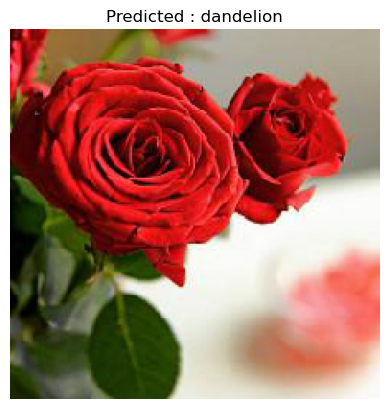

In [29]:
test_image_path = "C:/Users/HP/Downloads/11 Flowers-20241106T162343Z-001/11 Flowers/test/roses/roses_112.jpg"
predict_image(test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


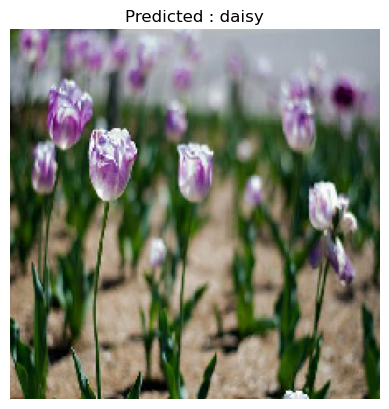

In [30]:
test_image_path = 'C:/Users/HP/Downloads/11 Flowers-20241106T162343Z-001/11 Flowers/test/tulips/tulips_509.jpg'
predict_image(test_image_path)